In [70]:
import numpy as np 
import glob
import os
import matplotlib.pyplot as plt

In [71]:
os.chdir('humpty-dumpty-ir-spectra')
os.getcwd()

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'humpty-dumpty-ir-spectra'

In [72]:
glob.glob('*')

octene_files = glob.glob('*1-octene*')
ethanol_files = glob.glob('*ethanol*')
toluene_files = glob.glob('*toluene*')

print(octene_files)
print(ethanol_files)
print(toluene_files)

['0001467554_1-OCTene.txt', '0001554849_1-octEne.txt', '0007601806_1-oCTene.txt', '0007688481_1-ocTEne.txt', '0014200651_1-OCTene.txt', '0018529148_1-OCtEnE.txt', '0021685735_1-Octene.txt', '0023771137_1-OCtENe.txt', '0023783401_1-ocTenE.txt', '0029710006_1-OctEne.txt', '0029989331_1-oCTEnE.txt', '0034943274_1-OcTeNE.txt', '0035243949_1-OcTEne.txt', '0037154826_1-OCTeNe.txt', '0039884488_1-ocTeNe.txt', '0041188565_1-OctEnE.txt', '0043395558_1-OcTenE.txt', '0054494880_1-oCteNe.txt', '0054990109_1-OctEnE.txt', '0058442889_1-OCtEne.txt', '0061005718_1-ocTeNE.txt', '0063943587_1-OcTenE.txt', '0066603154_1-octeNe.txt', '0074515163_1-ocTenE.txt', '0076307673_1-OcTeNe.txt', '0082984210_1-OcteNe.txt', '0095147054_1-octeNE.txt', '0095526354_1-OCtEnE.txt', '0096489964_1-octeNe.txt', '0097246571_1-OctEnE.txt', '0110516260_1-OcTeNe.txt', '0117138705_1-OCTene.txt', '0117762073_1-ocTENE.txt', '0126108812_1-octEnE.txt', '0128929281_1-oCteNe.txt', '0129812661_1-octENe.txt', '0132011563_1-OcTene.txt', 

In [73]:
#Test 1: Trying to get delimiter from the file header

test_header = "# Wavenumber\tTransmittence\n"
content_elements = ["# Wavenumber", "Transmittence\n"]
delimiter = []

for letter in content_elements:
    test_header = test_header.replace(letter, "")
delimiter.append(test_header)
delimiter

['\t']

In [74]:
#Test 2a: Read file and processing lines

with open('0001467554_1-OCTene.txt','r') as file:
    lines = file.readlines()
    print(lines)
    
#Test 2b: processing lines:
content_elements = ["# Wavenumber", "Transmittence\n"]
delimiter = []
revised_file = []

for line in lines:
    if line[0] == "#":
        for letter in content_elements:
            line = line.replace(letter, "")
            delimiter = line
    elif line[0] != "#": 
        new_line = line.replace('\n','')
        revised_file.append(new_line)
        
print(revised_file)  
delimiter

['# Wavenumber\tTransmittence\n', '658.00\t0.696980\n', '608.00\t0.719520\n', '633.00\t0.192220\n', '663.00\t0.734280\n', '618.00\t0.423320\n', '588.00\t0.899200\n', '623.00\t0.278580\n', '603.00\t0.802140\n', '653.00\t0.606540\n', '643.00\t0.355060\n', '638.00\t0.240280\n', '648.00\t0.473640\n', '583.00\t0.903520\n', '598.00\t0.850040\n', '593.00\t0.880000\n', '628.00\t0.200780\n', '613.00\t0.568440\n']
['658.00\t0.696980', '608.00\t0.719520', '633.00\t0.192220', '663.00\t0.734280', '618.00\t0.423320', '588.00\t0.899200', '623.00\t0.278580', '603.00\t0.802140', '653.00\t0.606540', '643.00\t0.355060', '638.00\t0.240280', '648.00\t0.473640', '583.00\t0.903520', '598.00\t0.850040', '593.00\t0.880000', '628.00\t0.200780', '613.00\t0.568440']


'\t'

In [75]:
# Test 3: Converting revised file to dictionary format where wavenumber is the key and transmittance is the value

test_dict1 = {}
for data in revised_file:
    wn_tm = data.split(delimiter)
    #print(wn_tm)
    test_dict1[float(wn_tm[0])] = float(wn_tm[1])
test_dict1      

{658.0: 0.69698,
 608.0: 0.71952,
 633.0: 0.19222,
 663.0: 0.73428,
 618.0: 0.42332,
 588.0: 0.8992,
 623.0: 0.27858,
 603.0: 0.80214,
 653.0: 0.60654,
 643.0: 0.35506,
 638.0: 0.24028,
 648.0: 0.47364,
 583.0: 0.90352,
 598.0: 0.85004,
 593.0: 0.88,
 628.0: 0.20078,
 613.0: 0.56844}

In [76]:
#Test 4: Expanding the scope to 3 Octene files
test = ['0001467554_1-OCTene.txt','0001554849_1-octEne.txt','0007688481_1-ocTEne.txt']
test_dict = {}            

for file in test:
    
    # Test 2a:
    with open(file,'r') as file:
        lines = file.readlines()   

    # Test 2b:
    content_elements = ["# Wavenumber", "Transmittence\n"]
    delimiter = []
    revised_file = []

    for line in lines:
        if line[0] == "#":
            for letter in content_elements:
                line = line.replace(letter, "")
                delimiter = line
        elif line[0] != "#": 
            new_line = line.replace('\n','')
            revised_file.append(new_line)
 
    
    # Test 3:
    for data in revised_file:
        wn_tm = data.split(delimiter)
        test_dict[float(wn_tm[0])] = float(wn_tm[1])
        
test_dict    



{658.0: 0.69698,
 608.0: 0.71952,
 633.0: 0.19222,
 663.0: 0.73428,
 618.0: 0.42332,
 588.0: 0.8992,
 623.0: 0.27858,
 603.0: 0.80214,
 653.0: 0.60654,
 643.0: 0.35506,
 638.0: 0.24028,
 648.0: 0.47364,
 583.0: 0.90352,
 598.0: 0.85004,
 593.0: 0.88,
 628.0: 0.20078,
 613.0: 0.56844,
 563.0: 0.7664,
 533.0: 0.92338,
 538.0: 0.87666,
 573.0: 0.86962,
 548.0: 0.62808,
 558.0: 0.69638,
 553.0: 0.60474,
 543.0: 0.75722,
 568.0: 0.81304,
 2533.0: 0.85498,
 2643.0: 0.6748,
 2573.0: 0.79388,
 2538.0: 0.84356,
 2603.0: 0.7565,
 2513.0: 0.8797,
 2618.0: 0.73486,
 2553.0: 0.81712,
 2578.0: 0.7893,
 2563.0: 0.80422,
 2528.0: 0.86298,
 2518.0: 0.87014,
 2568.0: 0.79858,
 2623.0: 0.72818,
 2608.0: 0.74912,
 2548.0: 0.8242,
 2633.0: 0.7108,
 2598.0: 0.76412,
 2628.0: 0.72378,
 2558.0: 0.81044,
 2613.0: 0.7419,
 2588.0: 0.78026,
 2583.0: 0.7853,
 2523.0: 0.86764,
 2593.0: 0.77212,
 2638.0: 0.6928,
 2543.0: 0.83196}

In [77]:
#Functionalise Test 4: 

def store(file, chemical_dict):
    with open(file,'r') as file:
        lines = file.readlines()

    # Test 2b:
    content_elements = ["# Wavenumber", "Transmittence\n"]
    delimiter = []
    revised_file = []

    for line in lines:
        if line[0] == "#":
            for letter in content_elements:
                line = line.replace(letter, "")
                delimiter = line
        elif line[0] != "#": 
            new_line = line.replace('\n','')
            revised_file.append(new_line)
 
    # Test 3:
    for data in revised_file:
        wn_tm = data.split(delimiter)
        chemical_dict[float(wn_tm[0])] = float(wn_tm[1])
        

In [82]:
#Run store function for all chemicals:

octene = {}
ethanol = {}
toluene = {}

data = [octene, ethanol, toluene]
raw_files = [octene_files, ethanol_files, toluene_files]

for chemical in raw_files:
    if chemical == octene_files:
        for i in chemical:
            store(i,octene)
    elif chemical == ethanol_files:
        for i in chemical:
            store(i, ethanol)
    elif chemical == toluene_files:
        for i in chemical:
            store(i, toluene)
#print(octene)
#print(ethanol)
#print(toluene)

In [80]:
octene_x = list(octene.keys())
octene_x.sort()
octene_y = [octene[i] for i in octene_x]

ethanol_x = list(ethanol.keys())
ethanol_x.sort()
ethanol_y = [ethanol[i] for i in ethanol_x]

toluene_x = list(toluene.keys())
toluene_x.sort()
toluene_y = [toluene[i] for i in toluene_x]

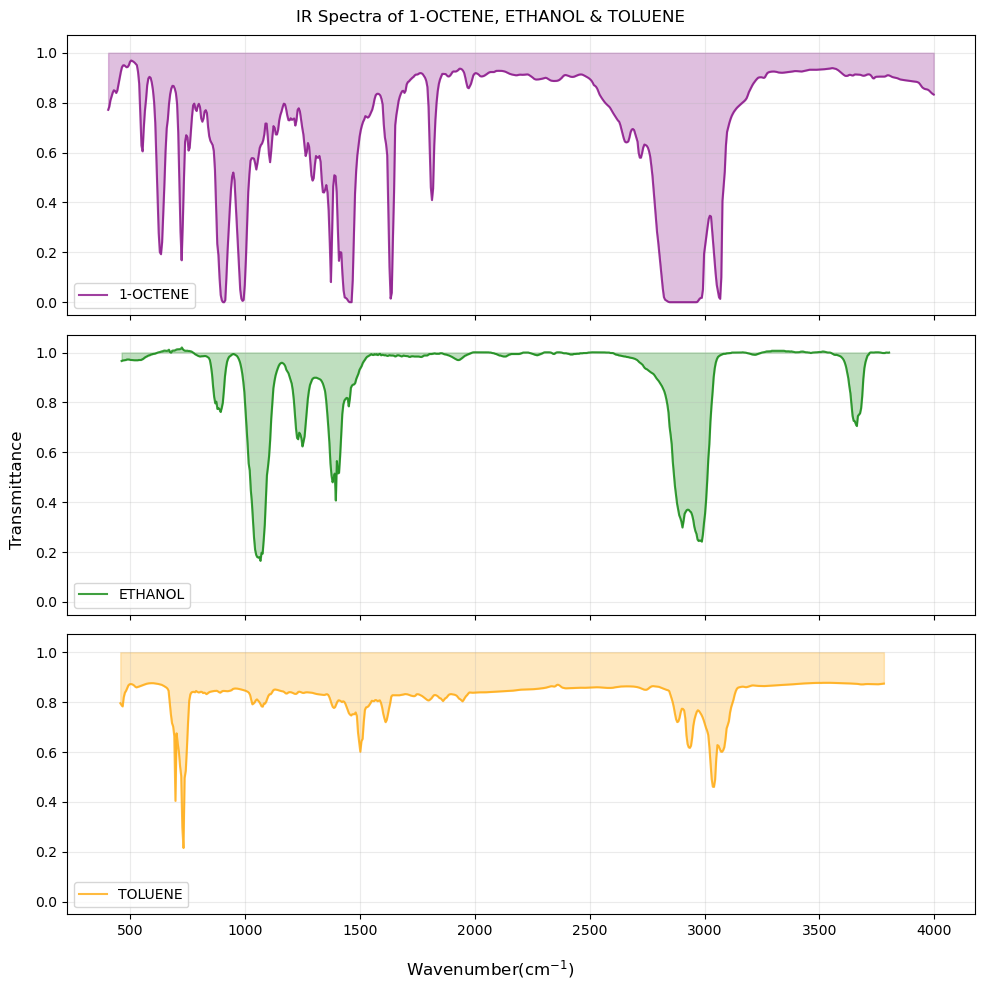

In [81]:
fig, ax = plt.subplots (nrows = 3, ncols = 1,
                        figsize=(10,10),
                        sharex = True,
                        sharey = True)

ax[0].plot(octene_x, octene_y, label = '1-OCTENE', alpha=.75, color='purple')
ax[0].fill_between(octene_x, 1, octene_y, alpha=.25, color='purple')
ax[1].plot(ethanol_x, ethanol_y, label = 'ETHANOL', alpha=.75, color='green')
ax[1].fill_between(ethanol_x, 1, ethanol_y, alpha=.25, color='green')
ax[2].plot(toluene_x, toluene_y, label = 'TOLUENE', alpha=.75, color='orange')
ax[2].fill_between(toluene_x, 1, toluene_y, alpha=.25, color='orange')

for a in ax:
    a.legend(loc='lower left')
    a.grid(alpha=.25)

fig.suptitle('IR Spectra of 1-OCTENE, ETHANOL & TOLUENE')
fig.supxlabel('Wavenumber(cm$^{-1}$)')
fig.supylabel('Transmittance')

plt.tight_layout()
plt.show()